In [1]:
import numpy as np

In [2]:
import snsims
import healpy as hp

In [28]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), 
                             fieldArea=9.6,
                             surveyDuration=10.,
                             zbinEdges=np.arange(0.10001, 1.1, 0.1))

In [29]:
# ten years
zdist.DeltaT

10.0

In [30]:
# The sky is >~ 40000 sq degrees ~ 4000 * LSST field of view
zdist.skyFraction * 2000 * 2

0.93084226773030898

In [31]:
zdist.numSN().sum()

19796

In [32]:
# To compare wih David's rate divide by number of days (note bins go from 0.1 to 1.0 in steps of 0.1)
zdist.numSN() / 3650.

array([ 0.03945205,  0.10493151,  0.21123288,  0.35671233,  0.52657534,
        0.71013699,  0.93342466,  1.14438356,  1.39671233])

In [22]:
# Get samples of those numbers and histogram (consistency, should not be new information) 
np.histogram(zdist.zSamples, np.arange(0.1, 1.0, 0.1)) [0]/3650.

array([ 0.03616438,  0.10630137,  0.2169863 ,  0.35726027,  0.51863014,
        0.72      ,  0.91726027,  1.1569863 ])

In [33]:
otherEstimate = np.array([0.0297949656, 0.0773033283291, 0.143372148164, 0.224245838014, 0.315868414203, 0.413859866222
, 0.513435128451, 0.609346340913, 0.696255385228])


In [36]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


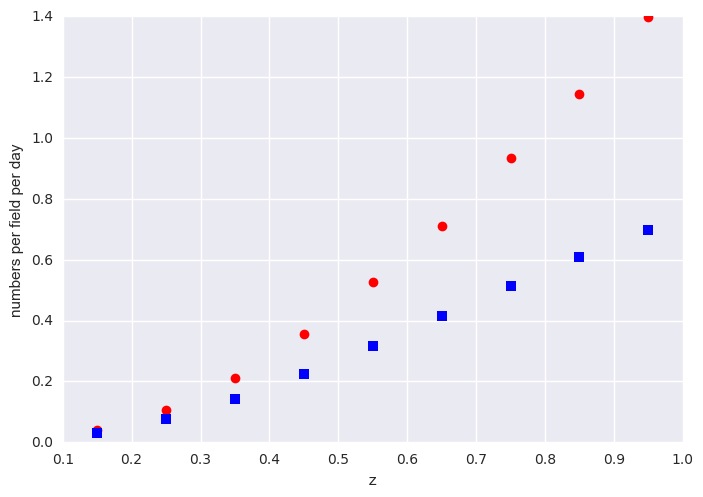

In [39]:
fig, ax = plt.subplots()
zvals = np.arange(0.15, 0.96, 0.1)
ax.plot(zvals, zdist.numSN()/ 3650., 'or')
ax.plot(zvals, otherEstimate, 'bs')
ax.set_xlabel('z')
ax.set_ylabel('numbers per field per day')